## About the Dataset

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('vgsales.csv')

In [3]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
#dimensions of the data
df.shape

(16598, 11)

There are 16k plus rows and 11 columns

In [5]:
#statistical inferences for numerical features
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
#null values and the percentage of null values
null=pd.DataFrame({'Columns':df.columns,'Values':df.isnull().sum(),'percentage':(df.isnull().sum()/df.shape[0])*100})

In [8]:
null

,Columns,Values,percentage
Rank,Rank,0,0.000000
Name,Name,0,0.000000
Platform,Platform,0,0.000000
Year,Year,271,1.632727
Genre,Genre,0,0.000000
Publisher,Publisher,58,0.349440
NA_Sales,NA_Sales,0,0.000000
EU_Sales,EU_Sales,0,0.000000
JP_Sales,JP_Sales,0,0.000000
Other_Sales,Other_Sales,0,0.000000


Both Publisher and Year has null values, Year has almost 1.6 percent of null values wheareas publisher has 0.3 percent of null values

In [9]:
df['Year']=df['Year'].fillna(method='ffill')

In [10]:
df['Publisher']=df['Publisher'].fillna(method='pad')

In [11]:
#i had filled the columns with ffill

In [12]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [13]:
#lets categorize the categorical as well as numerical column name in sep lists
num_cols=df.select_dtypes(include=np.number).columns.to_list()
cat_cols=df.select_dtypes(exclude=np.number).columns.to_list()

In [14]:
#information about numerical columns
for i in num_cols:
    print(i)
    print(50*'-')
    print(df[i].nunique())
#There is no encoded numerical columns as there are lot of unique values

Rank
--------------------------------------------------
16598
Year
--------------------------------------------------
39
NA_Sales
--------------------------------------------------
409
EU_Sales
--------------------------------------------------
305
JP_Sales
--------------------------------------------------
244
Other_Sales
--------------------------------------------------
157
Global_Sales
--------------------------------------------------
623


In [15]:
for j in cat_cols:
    print(j)
    print(60*'-')
    print(df[j].value_counts())

Name
------------------------------------------------------------
Need for Speed: Most Wanted                12
Ratatouille                                 9
FIFA 14                                     9
LEGO Marvel Super Heroes                    9
Madden NFL 07                               9
                                           ..
Ar tonelico Qoga: Knell of Ar Ciel          1
Galaga: Destination Earth                   1
Nintendo Presents: Crossword Collection     1
TrackMania: Build to Race                   1
Know How 2                                  1
Name: Name, Length: 11493, dtype: int64
Platform
------------------------------------------------------------
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG    

In [17]:
num_cols

['Rank',
 'Year',
 'NA_Sales',
 'EU_Sales',
 'JP_Sales',
 'Other_Sales',
 'Global_Sales']

In [21]:
df1=df.copy()

In [22]:
df1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


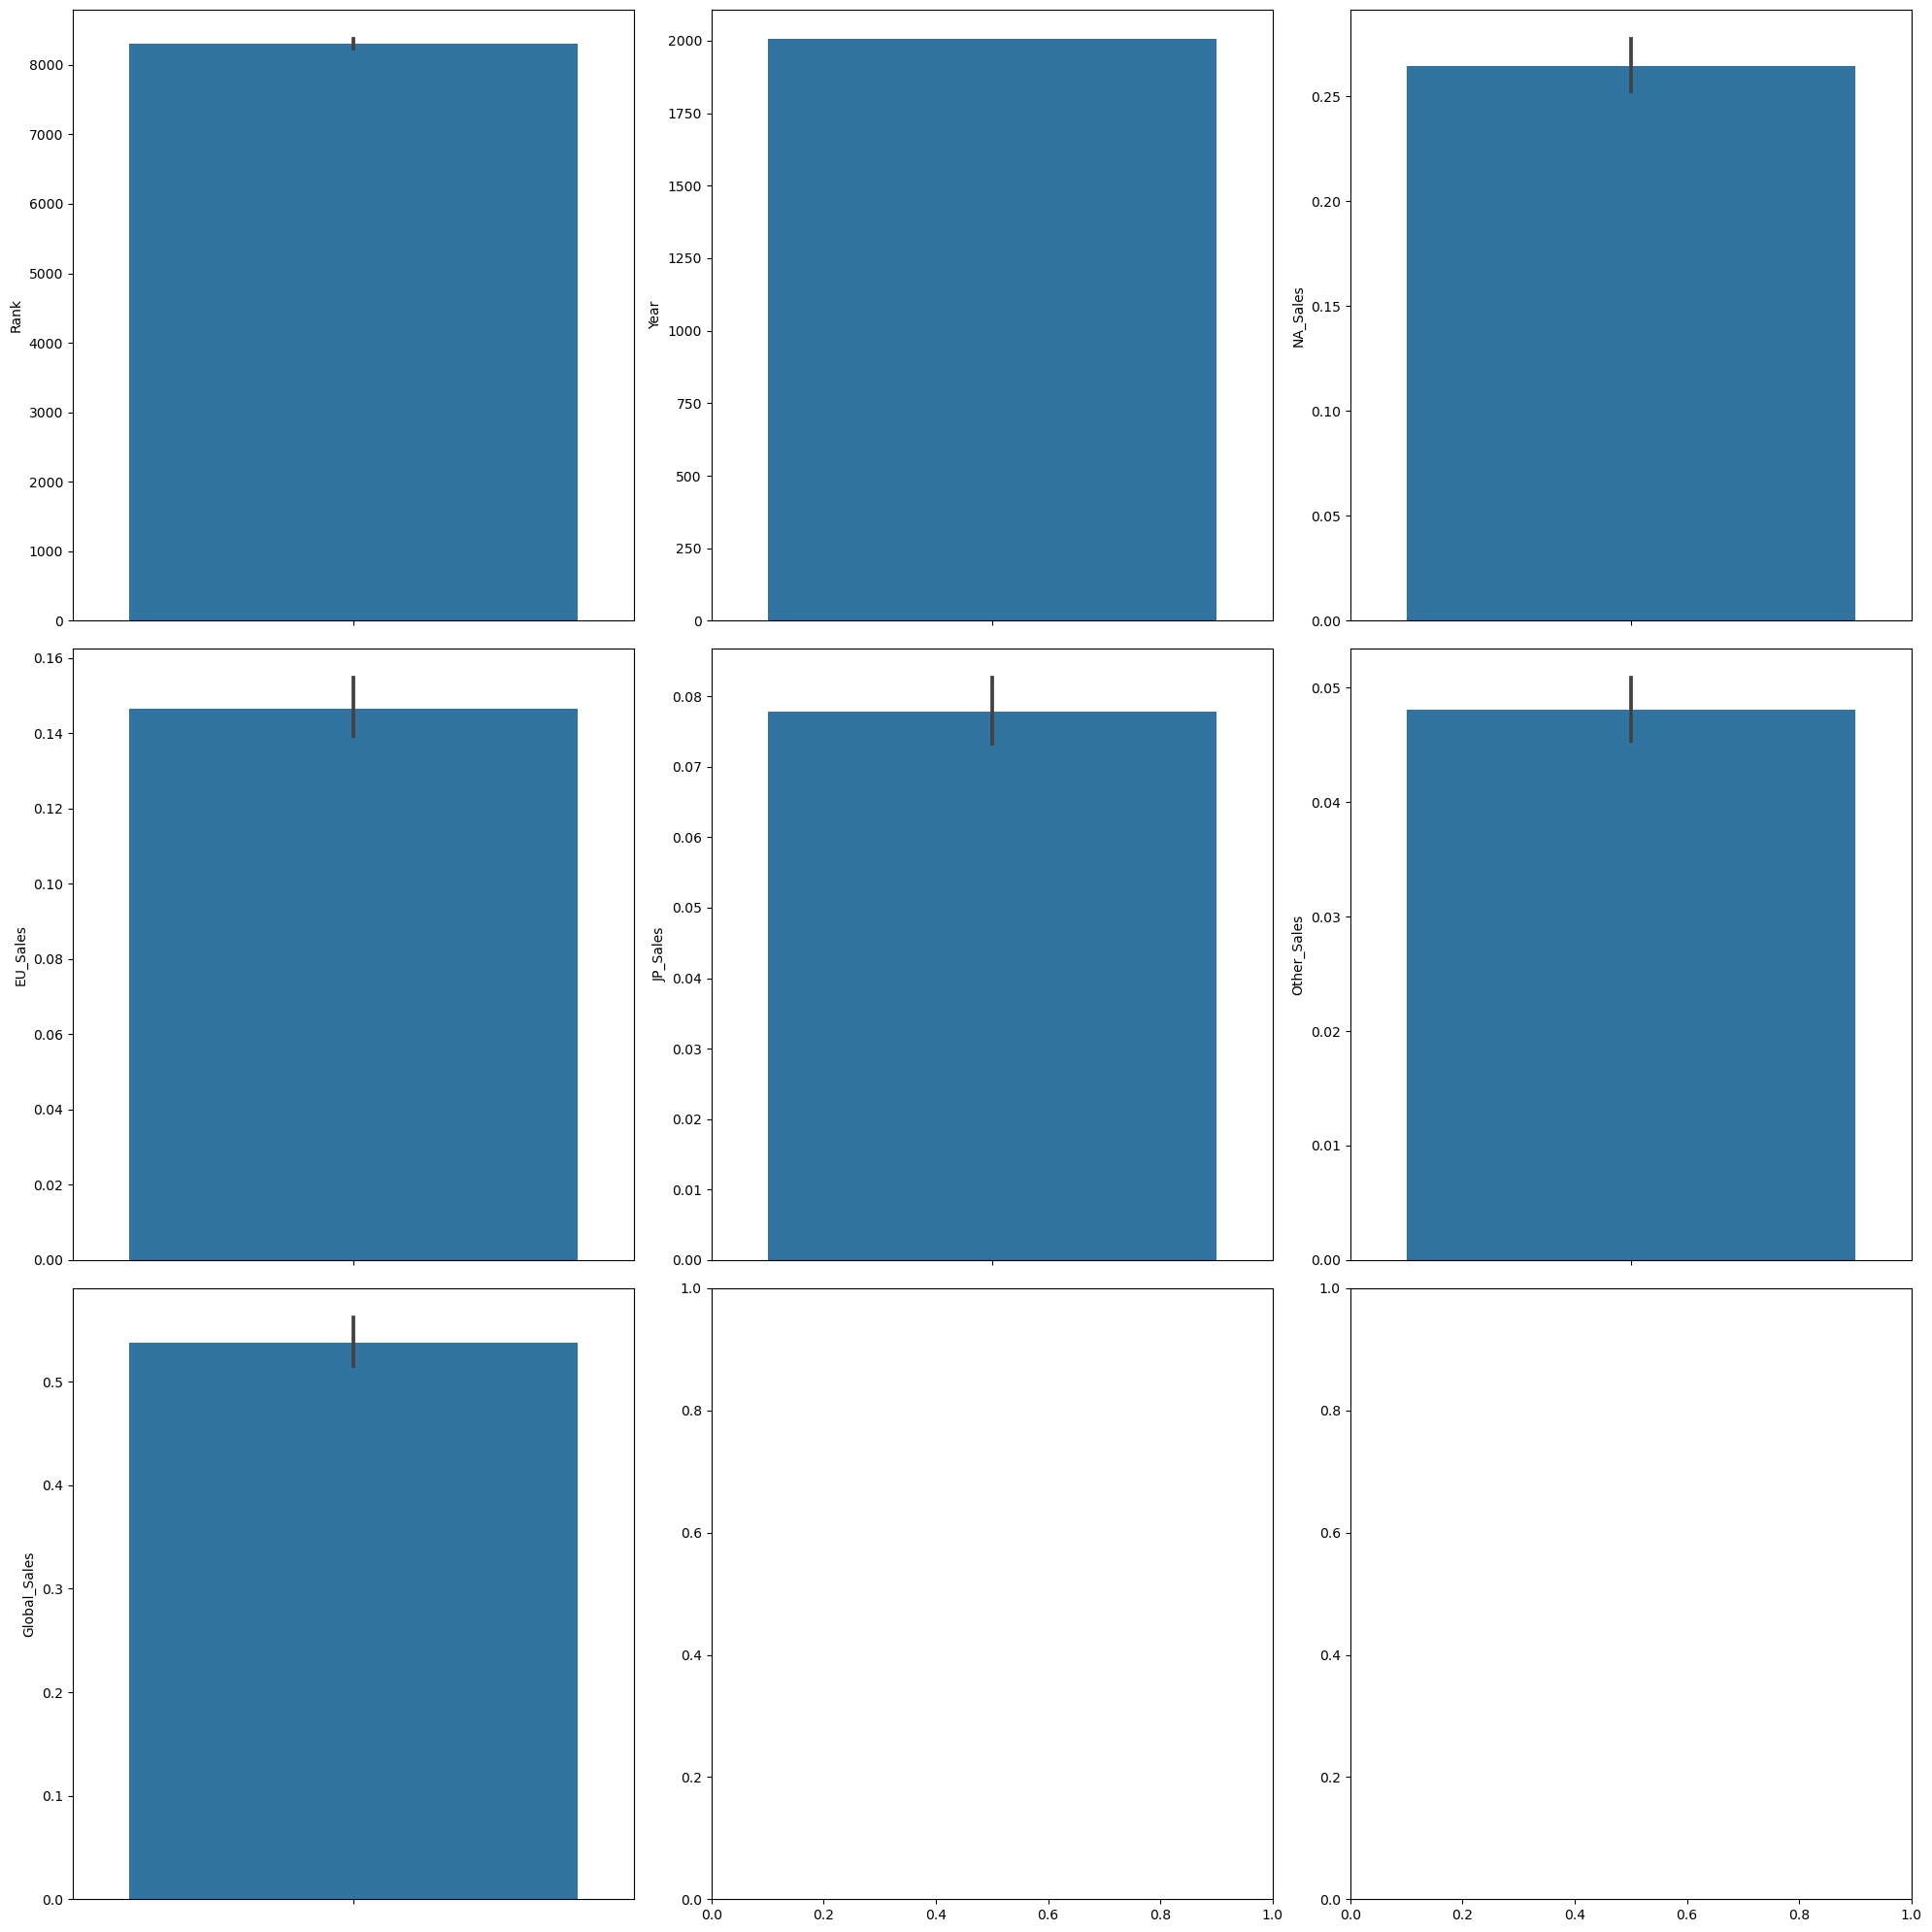

In [37]:
f,ax=plt.subplots(3,3,figsize=(20,20))

for i,v in zip(num_cols,ax.flatten()):
    sns.barplot(y=df1[i],ax=v)
    plt.tight_layout()
plt.show()

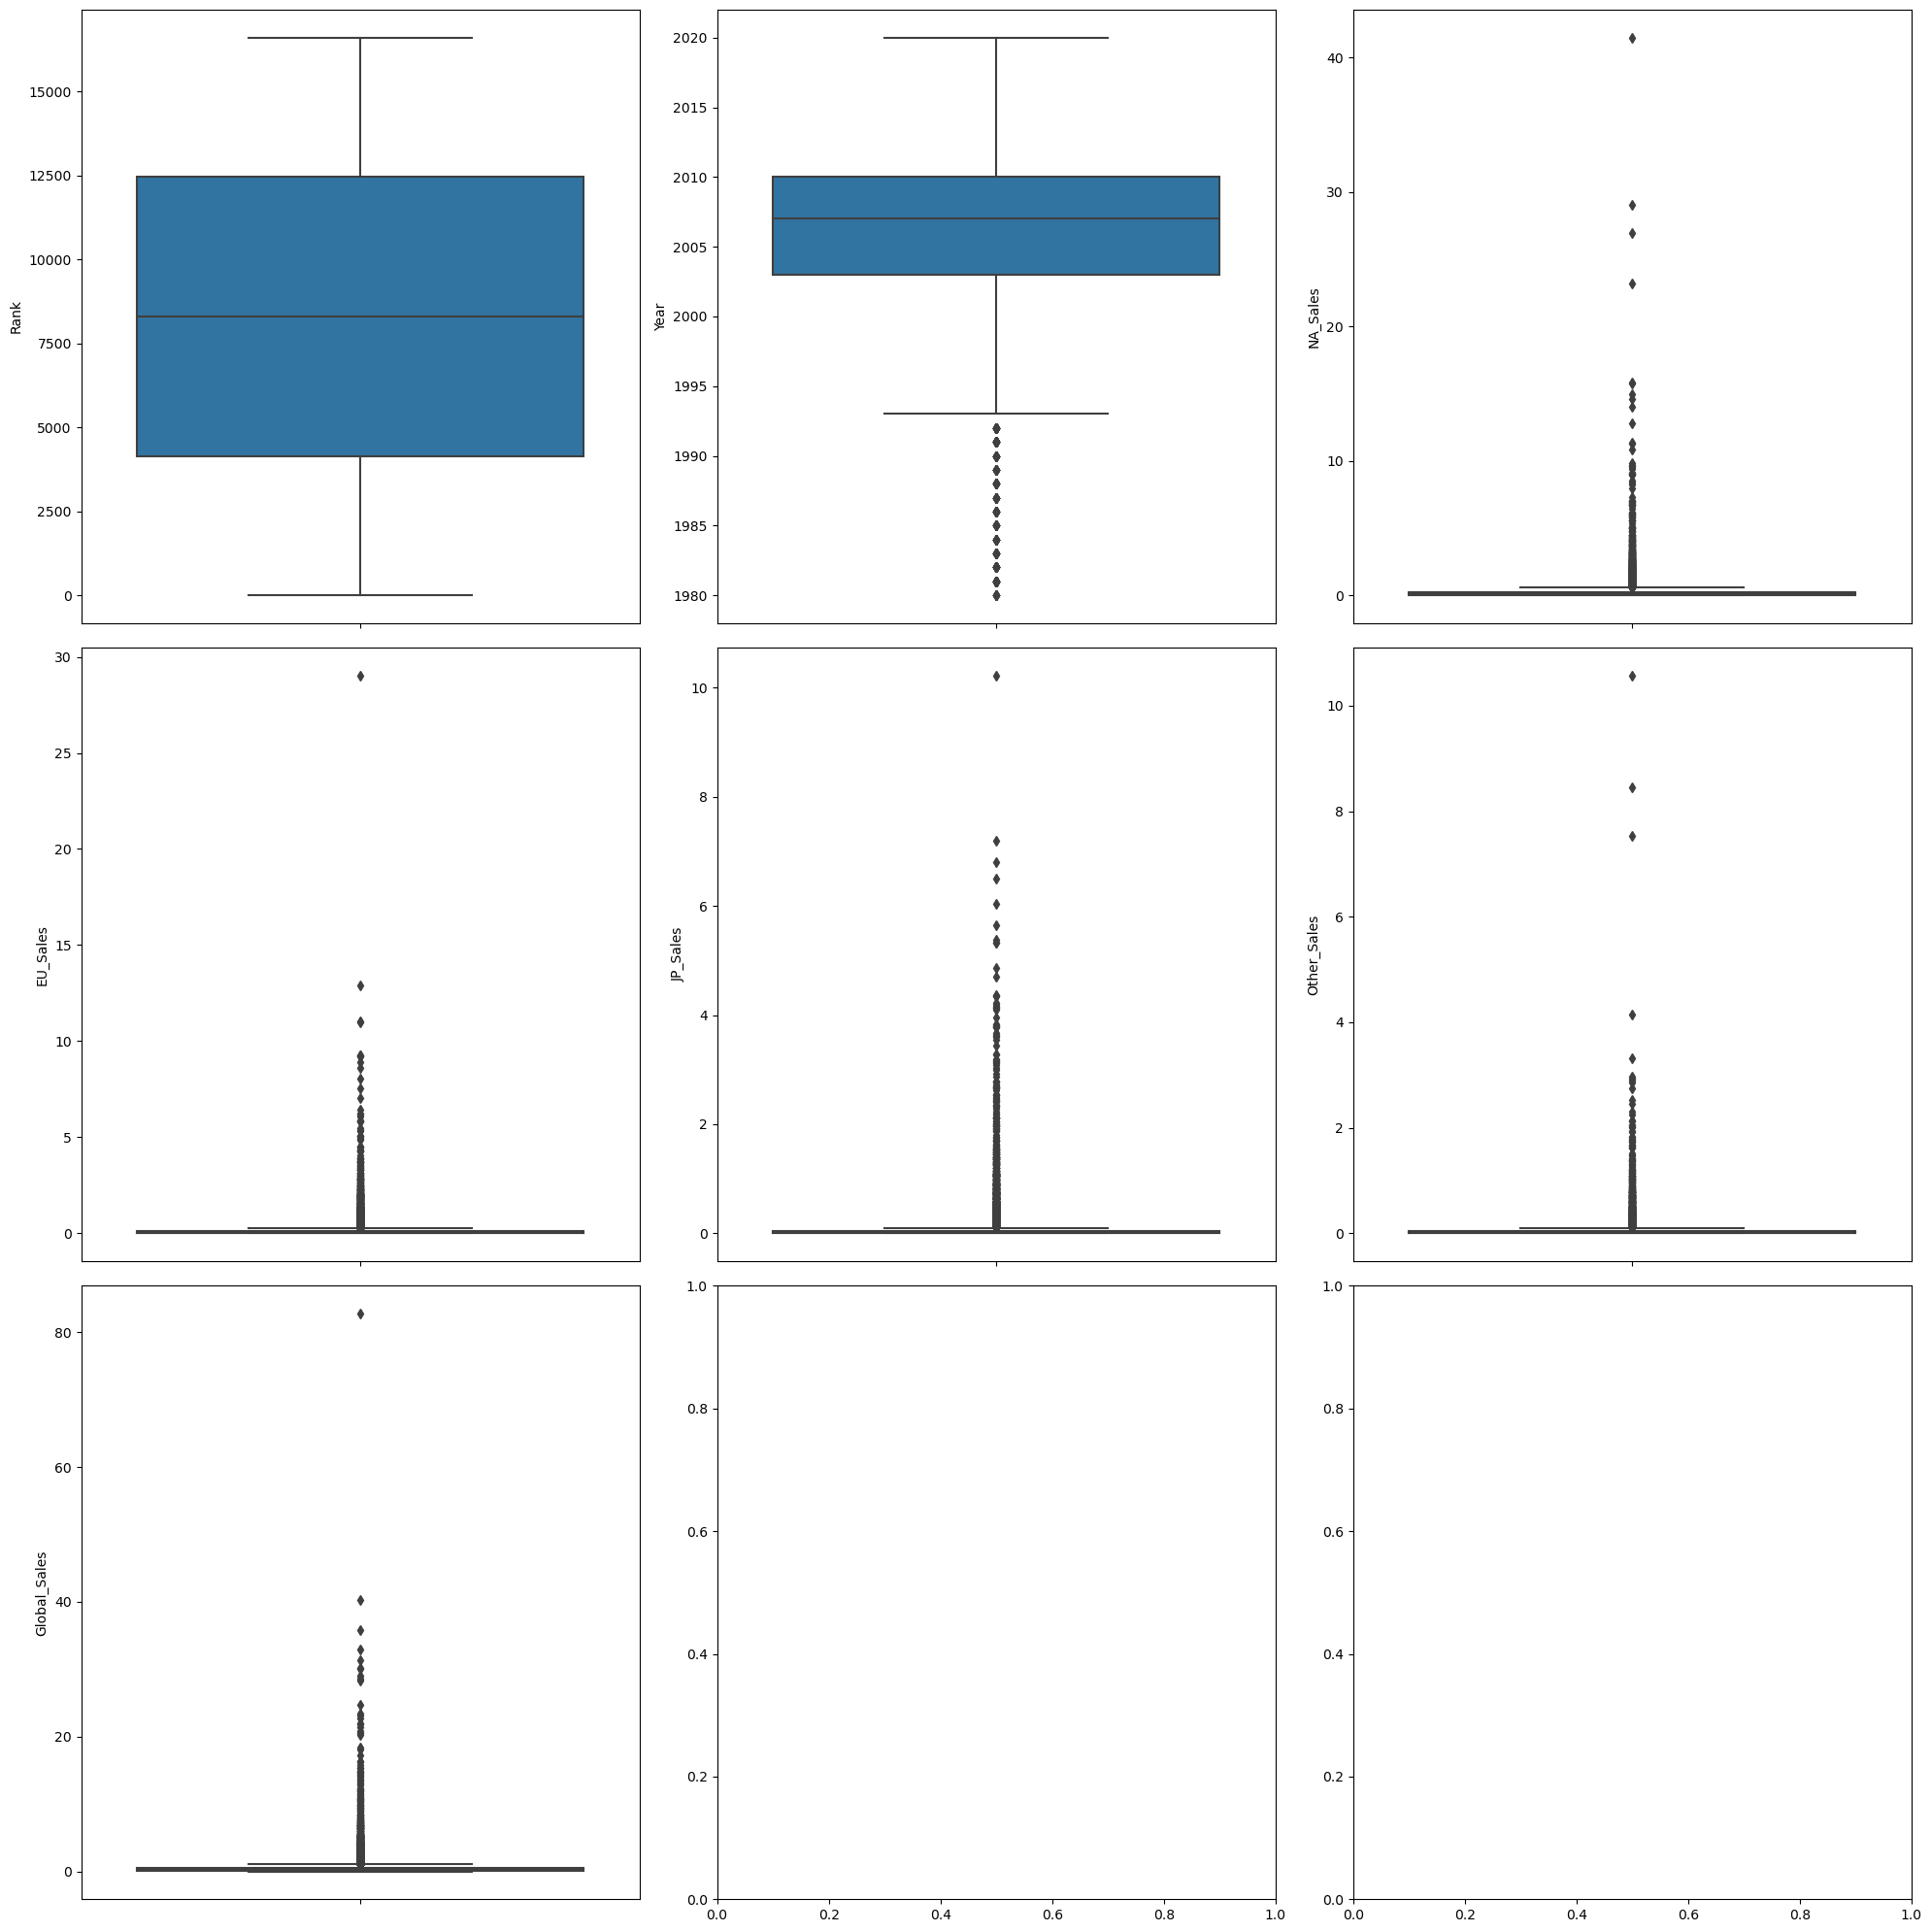

In [36]:
#exploratory Data Analysis
f,ax=plt.subplots(3,3,figsize=(20,20))

for i,v in zip(num_cols,ax.flatten()):
    sns.boxplot(y=df1[i],ax=v)
    plt.tight_layout()
plt.show()

In [38]:
len(cat_cols)

4

In [41]:
cat_cols

['Name', 'Platform', 'Genre', 'Publisher']

In [42]:
cat_cols.remove('Name')

In [43]:
cat_cols

['Platform', 'Genre', 'Publisher']

## genre Distribution

Text(0.5, 1.0, 'Genre Distribution')

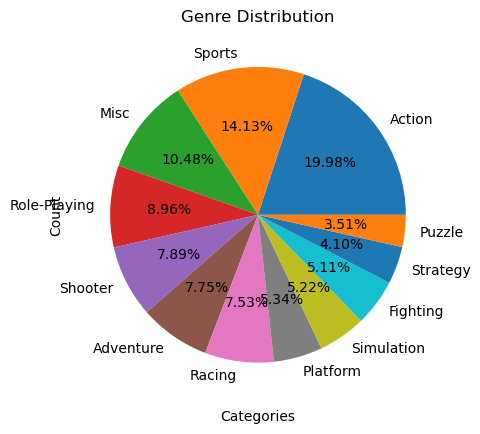

In [102]:
plt.pie(x=df['Genre'].value_counts(sort=True),autopct='%.2f%%',labels=df['Genre'].value_counts(sort=True).index)
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.xlabel("Categories")  # Set x-axis label
plt.ylabel("Count")  # Set y-axis label
plt.title("Genre Distribution") 

C:\Users\v2k\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Genre Distribution')

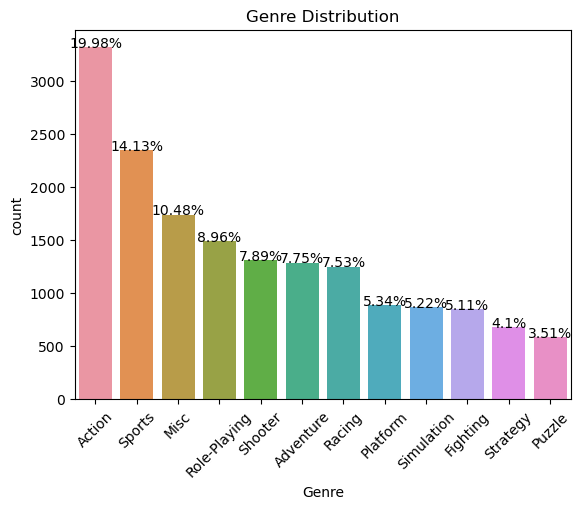

In [125]:
sns.countplot(df1['Genre'],order=df1['Genre'].value_counts().index)
for i,v in enumerate(df1['Genre'].value_counts()):
    plt.text(x = i , y = v, s = str(round((v/len(df1))*100,2))+'%', ha = 'center')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.title("Genre Distribution") 

In [126]:
df1

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## top 10 games with more global_Sales

In [148]:

val=df1[['Name','Global_Sales']].head(10)

<AxesSubplot:xlabel='Global_Sales', ylabel='Name'>

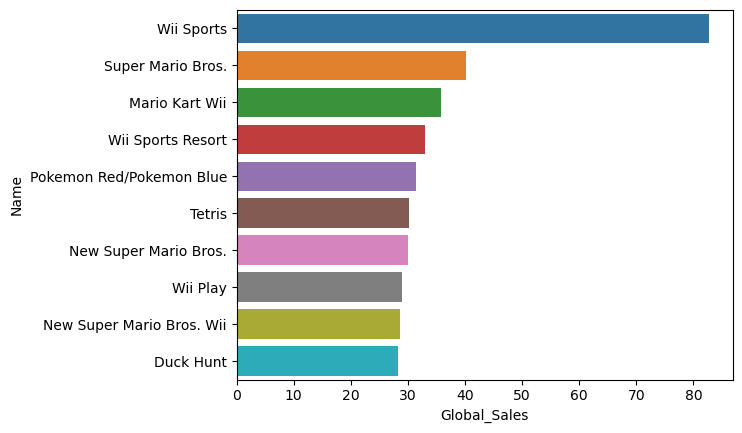

In [171]:
sns.barplot(y=val['Name'],x=val['Global_Sales'])

In [172]:
#as already the dataset is ranked and seggregated we dont need to do anything rather visualizing it.

## Year wise Global_Sales

In [178]:
v=df.groupby(df['Year'])[['Global_Sales']].sum()

In [187]:
v1=v.sort_values(by=['Global_Sales'],ascending=False).head(10).reset_index()

In [199]:
v1['Year']=v1['Year'].astype('str')

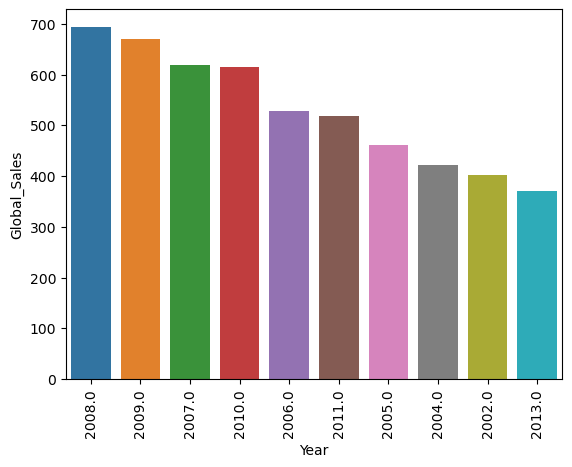

In [200]:
sns.barplot(data=v1,x=v1['Year'],y=v1['Global_Sales'].sort_values())
plt.xticks(rotation=90)
plt.show()

In [201]:
#we can see 2008 has the highest global sales in the video game industries

## Highest selled genre in an year.

In [253]:
v=df1.groupby(by=['Genre','Year'])[['Global_Sales']].sum().reset_index()
v2=v.groupby(by=['Year'])['Global_Sales'].transform(max)==v['Global_Sales'

In [260]:
vmax=v[v2].reset_index(drop=True)

In [267]:
val=vmax.sort_values(['Global_Sales'],ascending=False)

In [268]:
val

,Genre,Year,Global_Sales
8,Action,2008.0,141.02
38,Sports,2006.0,140.57
9,Action,2009.0,139.97
13,Action,2013.0,126.19
10,Action,2010.0,124.47
12,Action,2012.0,124.12
11,Action,2011.0,119.62
7,Action,2007.0,107.95
14,Action,2014.0,99.30
3,Action,2002.0,88.99


In [269]:
val['Genre'].value_counts()

Action          17
Platform         8
Sports           4
Role-Playing     3
Puzzle           2
Shooter          2
Fighting         2
Simulation       1
Name: Genre, dtype: int64

In [270]:
#we can see that more often Action genre Video games has been soled out highest global sales in the market.

## Platform which has Highest Sales Globally

In [275]:
k=df1.groupby(['Platform'])[['Global_Sales']].sum().reset_index().sort_values(['Global_Sales'],ascending=False)

In [276]:
k

,Platform,Global_Sales
16,PS2,1255.64
28,X360,979.96
17,PS3,957.84
26,Wii,926.71
4,DS,822.49
15,PS,730.66
6,GBA,318.50
19,PSP,296.28
18,PS4,278.10
13,PC,258.82


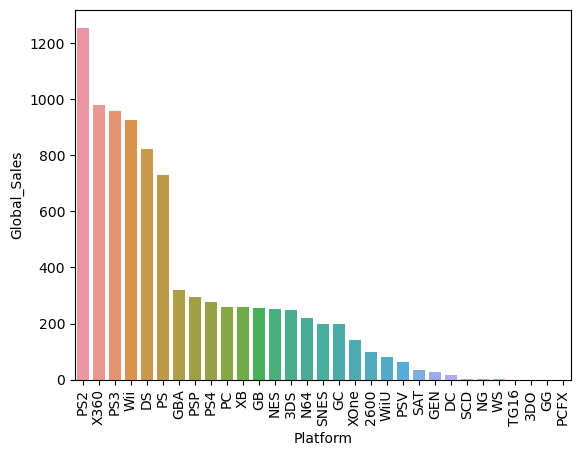

In [291]:
sns.barplot(x=k['Platform'],y=k['Global_Sales'])
plt.xticks(rotation=90)
plt.show()

In [292]:
#as we can see PS2 Platform has more video games selled globally over the years followed by X360.